In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

from game_engine import GameState

## Random bot
i.e. probability of going in any direction is equal

In [54]:
files = glob.glob("random_bot_games/*.csv")

games = []
for filepath in files:
    head, filename = os.path.split(filepath)
    root, ext = os.path.splitext(filename)
    if len(ext) > 0:
        date, random_seed = root.split('_', 1)
    #     if random_seed in random_seeds:
    #         print(f"Random seed {random_seed} already used!")
    #     random_seeds.append(random_seed)
    else:
        print(f"Unable to parse filename extension")

    with open(filepath, 'r') as f:
        lines = f.readlines()
        final_game_state = GameState.from_csv_line(lines[-1])
        if not final_game_state.game_over:
            print(f"Game not over for {filepath}")
            continue
    game_states = [GameState.from_csv_line(line) for line in lines]
    games.append(game_states)

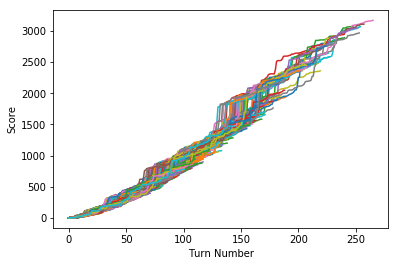

In [55]:
fig, ax = plt.subplots()
final_scores = []
for game_states in games:
    final_game_state = game_states[-1]
    final_scores.append(final_game_state.score)
    scores = [game_state.score for game_state in game_states]
    ax.plot(scores)
    ax.set_xlabel("Turn Number")
    ax.set_ylabel("Score")

avg turns to 64 tile: 53.8133764832794
median turns to 64 tile: 53.0


Text(0.5, 1.0, 'Random Bot: Turns to get to tile vs. Tile Value')

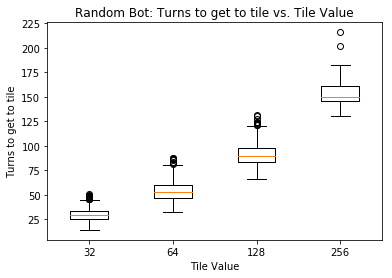

In [56]:
turns_to_tile = {32: [], 64: [], 128: [], 256: []}
for game_states in games:
#     print("====")
    # track which tiles were found so far
    tiles_remaining = {}
    for max_tile in turns_to_tile:
        tiles_remaining[max_tile] = True
    for turn_num in range(len(game_states)):
        game_state = game_states[turn_num]
        for max_tile in turns_to_tile:
            if tiles_remaining[max_tile]:
                if game_state.max_tile_value() == max_tile:
                    turns_to_tile[max_tile].append(turn_num)
                    tiles_remaining[max_tile] = False
#                     print(f"tile value {max_tile} found at turn {turn_num}")

# turns_to_tile

turns_to_64 = np.array(turns_to_tile[64])
print(f"avg turns to 64 tile: {np.mean(turns_to_64)}")
print(f"median turns to 64 tile: {np.median(turns_to_64)}")

fig, ax = plt.subplots()
data = [turns_to_tile[tile_value] for tile_value in sorted(turns_to_tile.keys())]
# print(data)
ax.boxplot(data, labels=sorted(turns_to_tile.keys()))
ax.set_xlabel("Tile Value")
ax.set_ylabel("Turns to get to tile")
ax.set_title(f"Random Bot: Turns to get to tile vs. Tile Value")

Text(0, 0.5, 'Percentile')

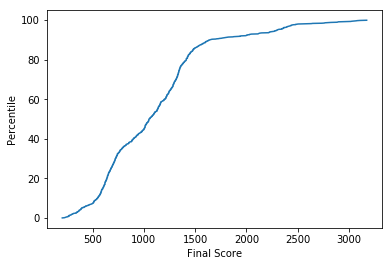

In [57]:
sorted_final_scores = sorted(final_scores)

plt.plot(sorted_final_scores, np.arange(len(games)) * 100 / len(games))
plt.xlabel("Final Score")
plt.ylabel("Percentile")

Text(0, 0.5, 'Avg tile values')

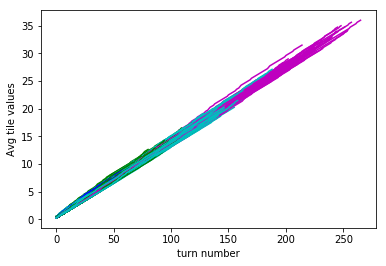

In [58]:
fig, ax = plt.subplots()
plot_colors = {16: 'r', 32: 'b', 64: 'g', 128: 'c', 256: 'm', 512: 'y'}
for game in games:
    avg_tile_values = [game_state.avg_tile_value() for game_state in game]
    final_game_state = game[-1]
    max_tile_val = final_game_state.max_tile_value()
    ax.plot(avg_tile_values, color=plot_colors[max_tile_val])

ax.set_xlabel("turn number")
ax.set_ylabel("Avg tile values")
    

Text(0, 0.5, 'number of tiles')

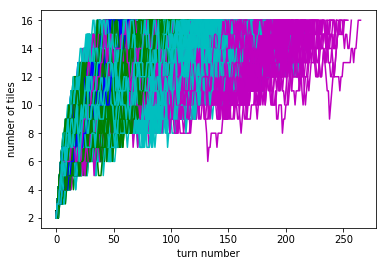

In [59]:
fig, ax = plt.subplots()
for game in games:
    num_tiles = [game_state.num_tiles() for game_state in game]
    final_game_state = game[-1]
    max_tile_val = final_game_state.max_tile_value()
    ax.plot(num_tiles, color=plot_colors[max_tile_val])

ax.set_xlabel("turn number")
ax.set_ylabel("number of tiles")


Text(0, 0.5, 'total duplicated tile values')

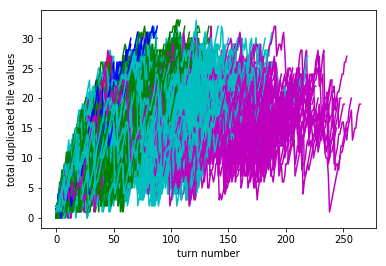

In [60]:
fig, ax = plt.subplots()
for game in games:
    duplicated_tile_values = [game_state.duplicated_tile_values() for game_state in game]
    final_game_state = game[-1]
    max_tile_val = final_game_state.max_tile_value()
#     if max_tile_val != 128:
#         continue
    ax.plot(duplicated_tile_values, color=plot_colors[max_tile_val])

ax.set_xlabel("turn number")
ax.set_ylabel("total duplicated tile values")



## Strong up left 
(i.e. probability of going up/left is 0.49, probability of going down/right is 0.01)

In [46]:
files = glob.glob("strong_up_left_games/*.csv")

games = []
for filepath in files:
    head, filename = os.path.split(filepath)
    root, ext = os.path.splitext(filename)
    if len(ext) > 0:
        date, random_seed = root.split('_', 1)
    #     if random_seed in random_seeds:
    #         print(f"Random seed {random_seed} already used!")
    #     random_seeds.append(random_seed)
    else:
        print(f"Unable to parse filename extension")

    with open(filepath, 'r') as f:
        lines = f.readlines()
        final_game_state = GameState.from_csv_line(lines[-1])
        if not final_game_state.game_over:
            print(f"Game not over for {filepath}")
            continue
    game_states = [GameState.from_csv_line(line) for line in lines]
    games.append(game_states)

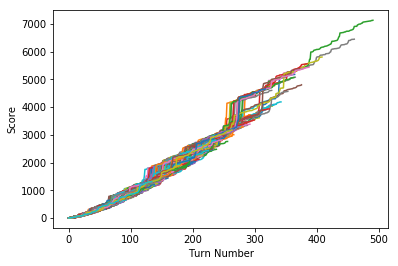

In [47]:
fig, ax = plt.subplots()
final_scores = []
for game_states in games:
    final_game_state = game_states[-1]
    final_scores.append(final_game_state.score)
    scores = [game_state.score for game_state in game_states]
    ax.plot(scores)
    ax.set_xlabel("Turn Number")
    ax.set_ylabel("Score")

avg turns to 64 tile: 52.40304568527919
median turns to 64 tile: 50.0


Text(0.5, 1.0, 'Random Bot: Turns to get to tile vs. Tile Value')

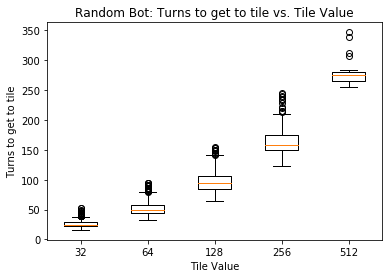

In [53]:
turns_to_tile = {32: [], 64: [], 128: [], 256: [], 512: []}
for game_states in games:
#     print("====")
    # track which tiles were found so far
    tiles_remaining = {}
    for max_tile in turns_to_tile:
        tiles_remaining[max_tile] = True
    for turn_num in range(len(game_states)):
        game_state = game_states[turn_num]
        for max_tile in turns_to_tile:
            if tiles_remaining[max_tile]:
                if game_state.max_tile_value() == max_tile:
                    turns_to_tile[max_tile].append(turn_num)
                    tiles_remaining[max_tile] = False
#                     print(f"tile value {max_tile} found at turn {turn_num}")

# turns_to_tile

turns_to_64 = np.array(turns_to_tile[64])
print(f"avg turns to 64 tile: {np.mean(turns_to_64)}")
print(f"median turns to 64 tile: {np.median(turns_to_64)}")

fig, ax = plt.subplots()
data = [turns_to_tile[tile_value] for tile_value in sorted(turns_to_tile.keys())]
# print(data)
ax.boxplot(data, labels=sorted(turns_to_tile.keys()))
ax.set_xlabel("Tile Value")
ax.set_ylabel("Turns to get to tile")
ax.set_title(f"Random Bot: Turns to get to tile vs. Tile Value")

Text(0, 0.5, 'Percentile')

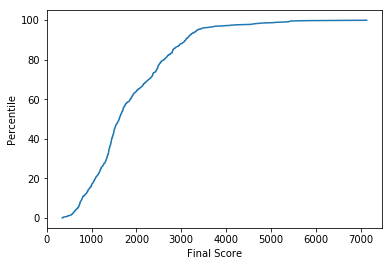

In [49]:
sorted_final_scores = sorted(final_scores)

plt.plot(sorted_final_scores, np.arange(len(games)) * 100 / len(games))
plt.xlabel("Final Score")
plt.ylabel("Percentile")

Text(0, 0.5, 'Avg tile values')

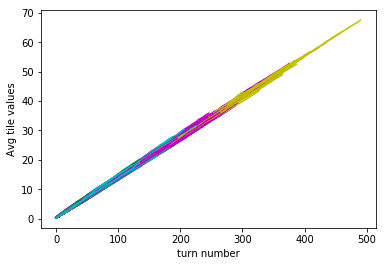

In [50]:
fig, ax = plt.subplots()
plot_colors = {16: 'r', 32: 'b', 64: 'g', 128: 'c', 256: 'm', 512: 'y'}
for game in games:
    avg_tile_values = [game_state.avg_tile_value() for game_state in game]
    final_game_state = game[-1]
    max_tile_val = final_game_state.max_tile_value()
    ax.plot(avg_tile_values, color=plot_colors[max_tile_val])

ax.set_xlabel("turn number")
ax.set_ylabel("Avg tile values")
    

Text(0, 0.5, 'number of tiles')

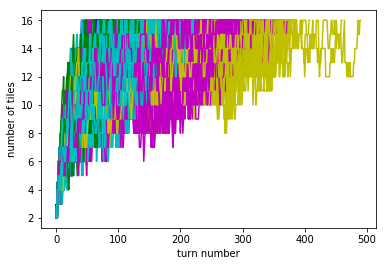

In [51]:
fig, ax = plt.subplots()
for game in games:
    num_tiles = [game_state.num_tiles() for game_state in game]
    final_game_state = game[-1]
    max_tile_val = final_game_state.max_tile_value()
    ax.plot(num_tiles, color=plot_colors[max_tile_val])

ax.set_xlabel("turn number")
ax.set_ylabel("number of tiles")


Text(0, 0.5, 'total duplicated tile values')

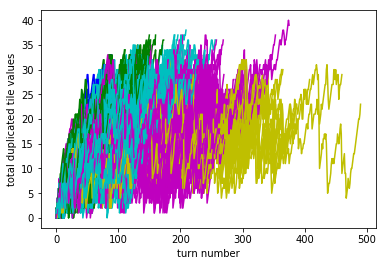

In [52]:
fig, ax = plt.subplots()
for game in games:
    duplicated_tile_values = [game_state.duplicated_tile_values() for game_state in game]
    final_game_state = game[-1]
    max_tile_val = final_game_state.max_tile_value()
#     if max_tile_val != 128:
#         continue
    ax.plot(duplicated_tile_values, color=plot_colors[max_tile_val])

ax.set_xlabel("turn number")
ax.set_ylabel("total duplicated tile values")

